In [1]:
# OpenCV - used for image loading and processing
import cv2
# Numpy - used for calculations
import numpy as np
# Glob - for converting file lists to arrays
import glob

# Generating a dataset

### Generate a file list using glob

With glob you can pass paths to datasets and use wildcards to return a list of all the files into a useful array. Make an array containing the file names of all the galaxy images.

### Read an image using OpenCV2

To start this task you will need to load images into python arrays. One way of doing this is using OpenCV. Here is a link to the OpenCV introduction to image manipulation:

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

Load one of the images from the file name array you just created (in greyscale).

### Plot the image using matplotlib

We can use OpenCV to plot images, however, it can be rather cumbersome for our needs. I would suggest using matplotlib to plot the image. Use matplotlib to display the image you have loaded.

(-0.5, 799.5, 799.5, -0.5)

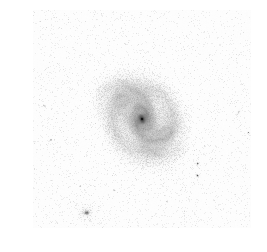

### Log the flux

In astronomy we often rescale the flux of an image to show details that would normally be washed out by the high intensity regions. One popular way to do this is to instead take the logarithm of the flux in each pixel. Rescale the image by taking the logarithm of each pixel.

(-0.5, 799.5, 799.5, -0.5)

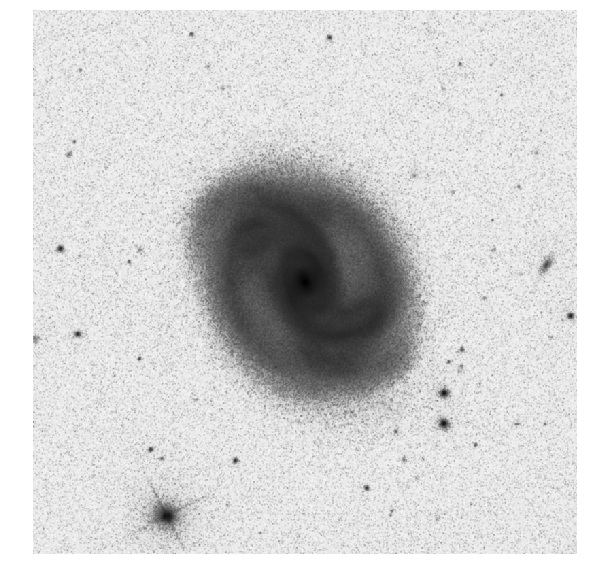

### Apply a gaussian blur

You might notice that this image has some background flux. To counteract this we can apply a random gaussian blur to distribute the flux between pixels more evenly. Apply a gaussian blur to the image.

(-0.5, 799.5, 799.5, -0.5)

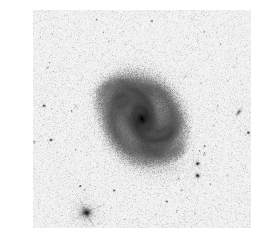

### Any further preprocessing

Consider any further preprocessing steps you could make to increase the usefulness of the images.

### Combine the previous steps into a single function

Now you have the makings of a preprocessing pipeline. Combine the previous steps into a single function that takes a file name as an input and returns a log scaled and blurred image.

(-0.5, 799.5, 799.5, -0.5)

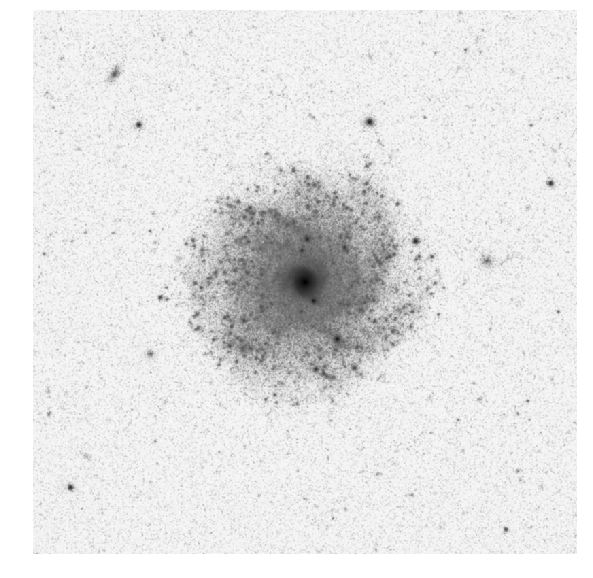

## Create a fuction to calculate features

You can now load and preprocess images. The next step is to consider possible features you might want to extract from the images. 

### Circular mask

Before we can do anything we need to create a mask that we can use for selecting groups of pixels. Create a function that takes a shape array and a radius and returns a boolean array of the given shape with indexes inside the radius equal to True.

array([[False, False,  True, False, False],
       [False,  True,  True,  True, False],
       [ True,  True,  True,  True,  True],
       [False,  True,  True,  True, False],
       [False, False,  True, False, False]])

### Gini coefficient

As mentioned an interesting variable to consider is the Gini coefficient. Create a function that takes an array as an input and returns the Gini coefficient of the array.

0.18064487872229434

### Gini profile

You can now calculate the Gini coefficient for a given array. Now using the circlar mask, calculate the Gini coefficient at different radii and produce a plot of radius versus Gini coefficient.

Text(0,0.5,'Gini')

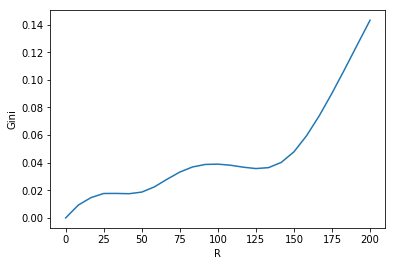

### Gini gradient

The next thing to consider is the derivative of this profile. Calculate the gradient of the profile you just produced and display it using matplotlib.

Text(0,0.5,'d/d$R$ Gini')

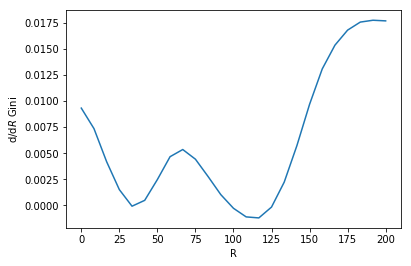

## Generating features

Using the Gini profiles you have just created create a function that takes a file name as an input and outputs some features of the Gini profle. For example: the minimum values of the Gini gradient, the radius of the mask at this point, the maximum gini coeffient, the radius at this point. 

(300.0, 0.18219775622288198, 0.18684647457765005, 264.0)

### Generate a feature dataset

Now modify the function to write the values to a file and loop over all images in the dataset. Make sure you include the file name as one of your outputs (you will need this!)

### Load the output into a pandas dataframe

Now you have created your dataset, load it as a dataframe using pandas.

,f_name,R_at_min_dG/dR,min_dG/dR,max_G,R_at_max_G
0,datasets/barred_galaxies/poisson_noise_bg_run6...,120,0.037482,0.228998,300
1,datasets/barred_galaxies/poisson_noise_bg_run6...,300,0.182198,0.186846,264
2,datasets/barred_galaxies/poisson_noise_bg_run7...,252,0.109867,0.121911,168
3,datasets/barred_galaxies/poisson_noise_bg_run6...,84,0.156365,0.173761,60
4,datasets/barred_galaxies/poisson_noise_bg_star...,192,0.207611,0.232584,144
5,datasets/barred_galaxies/poisson_noise_bg_star...,144,0.209928,0.237699,108
6,datasets/barred_galaxies/poisson_noise_bg_run6...,108,0.035878,0.221691,300
7,datasets/barred_galaxies/poisson_noise_bg_run....,72,0.012677,0.285708,300
8,datasets/barred_galaxies/poisson_noise_bg_run6...,252,0.210685,0.238696,180
9,datasets/barred_galaxies/poisson_noise_bg_run6...,240,0.142264,0.172346,156


# Unsupervised clustering

Start by trying to use unsupervised clustering algorithms to try to seperate barred and unbarred galaxies using your features.

### Generate a dataframe without the file names

First, you will need to drop the file names from the dataframe. Make a new dataframe which only contains the features.

### Standardize features

Because the features all have different scales you will need to standardize them, otherwise the fitting will be biased. Use the inbuilt scikit-learn StandardScaler function to standardize your features.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

## Pick a clustering algorthm

Go ahead and pick a clustering algorthm to use. You might want to do some plotting to see how which ones might be best to use. 

You can see a comparison of different methods on the scikit-learn website:
https://scikit-learn.org/stable/modules/clustering.html

Once you have picked your algorthm(s), import and initialize them.

### Spectral 

https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering

### Birch 

https://scikit-learn.org/stable/modules/clustering.html#birch

### GMM <-

https://scikit-learn.org/stable/modules/mixture.html#mixture

### Fit using your selected classifier

Now go ahead and fit your chosen algorithm.

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)

### Use your model to predict the labels

Use your model to predict the different classes from your feature space.

### Compare the clusters

Use matplotlib to compare the clusters your algorithm has identified.

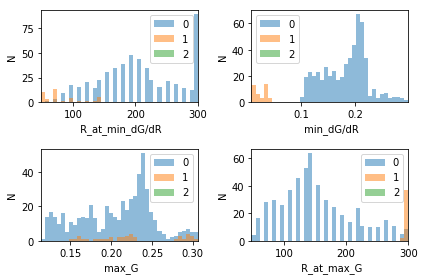

## Compare to human classification

In this task we actually have human classifications for all the galaxies. Let's compare the clusters that you have found to the actual distribution of barred and unbarred galaxies.

### Load the labeled dataframe

The barred_unbarred.csv file contains the file names and flags for each file, 1 denotes barred and 0 unbarred. Load the csv file into a new pandas dataframe

,f_name,barred
0,datasets/barred_galaxies/poisson_noise_bg_run....,1
1,datasets/barred_galaxies/poisson_noise_bg_run....,1
2,datasets/barred_galaxies/poisson_noise_bg_run....,1
3,datasets/barred_galaxies/poisson_noise_bg_run....,1
4,datasets/barred_galaxies/poisson_noise_bg_run....,1
5,datasets/barred_galaxies/poisson_noise_bg_run....,1
6,datasets/barred_galaxies/poisson_noise_bg_run....,1
7,datasets/barred_galaxies/poisson_noise_bg_run....,1
8,datasets/barred_galaxies/poisson_noise_bg_run....,1
9,datasets/barred_galaxies/poisson_noise_bg_run....,1


### Change the index to the file name

You will need to join the two pandas dataframes. To do this first you need to change the index of each dataframe to the file name column

### Join the two dataframes

Next you can simply join the two dataframes into one new dataframe.

,R_at_min_dG/dR,min_dG/dR,max_G,R_at_max_G,barred
f_name,,,,,
datasets/barred_galaxies/poisson_noise_bg_run.201.std_1_highres.fits.png,300,0.279797,0.291865,252,1
datasets/barred_galaxies/poisson_noise_bg_run.201.std_2_highres.fits.png,300,0.243587,0.285907,216,1
datasets/barred_galaxies/poisson_noise_bg_run.201.std_3_highres.fits.png,72,0.012003,0.293822,300,1
datasets/barred_galaxies/poisson_noise_bg_run.201.std_4_highres.fits.png,264,0.253109,0.294296,192,1
datasets/barred_galaxies/poisson_noise_bg_run.240.std_1_highres.fits.png,72,0.013397,0.293225,300,1
datasets/barred_galaxies/poisson_noise_bg_run.240.std_2_highres.fits.png,72,0.012677,0.285708,300,1
datasets/barred_galaxies/poisson_noise_bg_run.240.std_3_highres.fits.png,300,0.267561,0.299163,228,1
datasets/barred_galaxies/poisson_noise_bg_run.240.std_4_highres.fits.png,72,0.013204,0.292551,300,1
datasets/barred_galaxies/poisson_noise_bg_run.252.s2.std_1_highres.fits.png,300,0.248489,0.299986,204,1


### Plot the real distribution

You now have your features and the actual label for the galaxy (barred/unbarred). Now using matplotlib to compare the distribution of barred and unbarred galaxies in your feature space and compare the the clusters you found before.

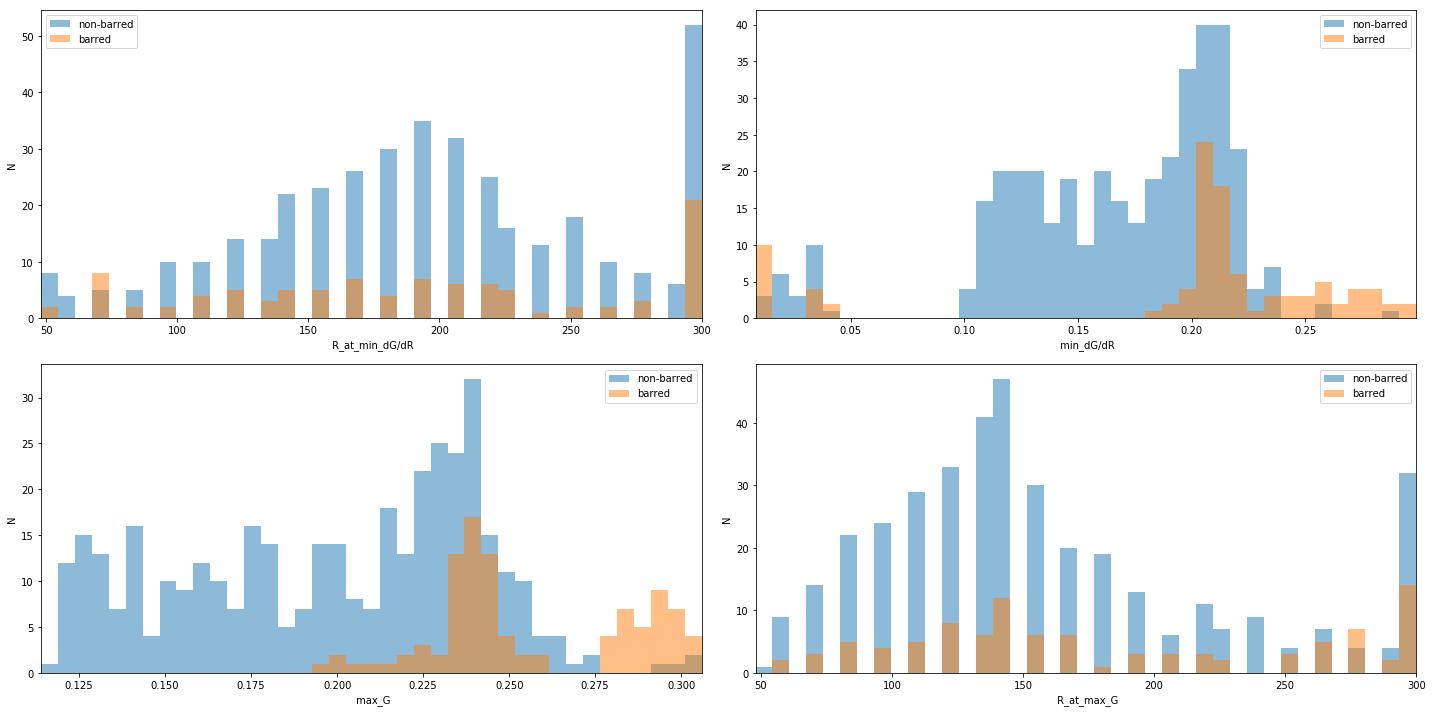

# Supervised machine learning

Clearly for this take unsupervised machine learning can only get us so far. But because we have the actual labels we can go ahead and use supervised machine learning instead.

### Drop any NaNs

Start by dropping all the NaNs in your dataframe

### Seperate observations from features

Now seperate your dataframe into observations (features) and targets (actual labels)

### Standardize features 

Again you will need to standardize your features to avoid bias.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### Split the data into training and test data

Next split your datasets into a training set and a test set. You can hard code this if you want, but I would suggest using the scikit-learn function train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Logistic regression

Let's start with a vary widely used algorithm, logistic regression. Initialize, train and evaluate a logistic regression model.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Loss = 0.316965008014 & accuracy = 0.86301369863


### SGDC

Compare to annother widely used classifier, Stochastic Gradient Decient Classifier.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Loss = 0.41862104304 & accuracy = 0.821917808219


### Suport vector machine

Next, compare to a suport vector machine approach.

https://scikit-learn.org/stable/modules/svm.html

Loss = 0.406314814693 & accuracy = 0.828767123288


### Pick one more

Pick a further classifier, train a model and compare to LG, SGDC and SVM.

https://scikit-learn.org/stable/supervised_learning.html

## Create a GridSearch pipeline

With machine learning techniques come hyperparameters. These parameters need to be tuned to get the optimal model. Create a grid search pipeline to explore teh hyperparameter space and find the optimal model.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 jobs       | elapsed:    1.0s


Loss = 0.316510772376 & accuracy = 0.86301369863


[Parallel(n_jobs=-1)]: Done 282 out of 288 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:    1.5s finished


## Futher model evaulation

One of the most important steps in machine learning is evaluation. Does a model really do a good job? Is it overfit? 

### Generate a confusion matrix

One quick tool is the confusion matrix. This is often used for spare feature spaces, but can still be a useful tool in this project. Create a confusion matrix for your best model.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization
[[115   0]
 [ 20  11]]


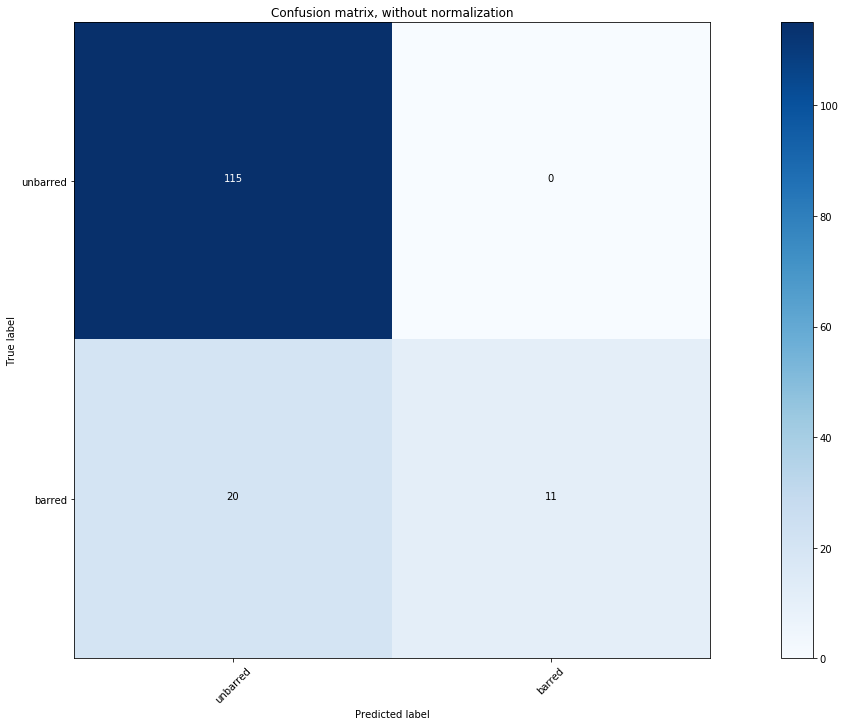

# Next steps

Now you have a way to create models for the feature space you have generated. As is always the case with machine learning, the quality of the feature space is the most important part of the process. Go back and try to find better features and get better and better models.